In [37]:
#menghubungkan colab dengan google drive from google.colab import drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
#memanggil data set lewat gdrive

path = "/content/gdrive/MyDrive/praktikum_ml/praktikum03/"

In [39]:
import pandas as pd

df = pd.read_csv(path + "data/socr.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [6]:
##Konversi data menjadi satuan cm dan kg
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,
        berat_kg=lambda d: d["berat_kg"] * 0.45359237
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()

df1.head()


,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [7]:
from re import X
##Split data training 80% dan data testing 20%
from sklearn.model_selection import train_test_split

#Variabel independent/bebas
X = df1[['tinggi_cm']]
#variabele dependent/terikat
y = df1[['berat_kg']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


In [8]:
from sklearn.linear_model import LinearRegression
## pemodelan data:dengan data training
#buat object model instan dari class linearRegresion
model = LinearRegression()
#lakukan proses training
model.fit(X_train, y_train)

LinearRegression()

In [9]:
import os
print(os.getcwd())  # ini folder kerja saat ini


/content


In [10]:
# import library yang dibutuhkan
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# prediksi model dengan data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

df_resume = pd.DataFrame()
df_resume['R2']=r2
df_resume['Koefisien (Kg/cm)']= model.coef_[0]
df_resume['Intercept (Kg)']= model.intercept_[0]
df_resume['MAE (kg)']= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
df_resume['MSE (kg)']= mse
df_resume['RMSE (kg)']= rmse
df_resume

,R2,Koefisien (Kg/cm),Intercept (Kg),MAE (kg),MSE (kg),RMSE (kg)
0,NaN,0.551823,-37.657089,3.670411,21.242938,4.609006


In [11]:
slope = model.coef_[0].item()
intercept = model.intercept_[0].item()
print(f"Persamaan: y = {slope:.3f}x + {intercept:.3f}")

Persamaan: y = 0.552x + -37.657


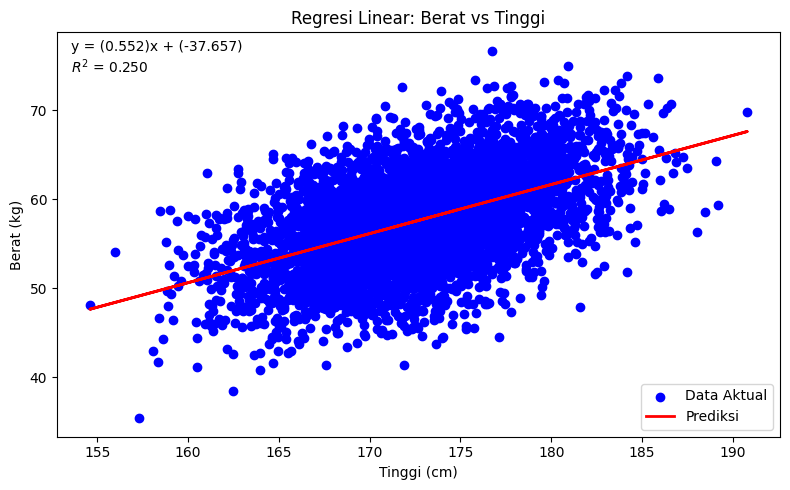

In [12]:
import matplotlib.pyplot as plt

# Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")

# Garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")

plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")

# Teks persamaan regresi (perbaiki format string agar valid)
plt.text(
    0.02,
    0.98,
    f"y = ({slope:.3f})x + ({intercept:.3f})\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,
    va="top"
)

plt.legend()
plt.tight_layout()
plt.show()


In [15]:
y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy().ravel(),
    "Berat aktual (kg)": y_test.to_numpy().ravel(),
    "Berat Prediksi (kg)": y_pred_test.ravel()
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - error/aktual)), dibatasi 0–100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil


,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762990,8.602990,82.848904
1,171.31,50.33,56.875754,6.545754,86.994329
2,169.29,58.22,55.761071,-2.458929,95.776488
3,163.30,58.92,52.455650,-6.464350,89.028598
4,170.52,63.06,56.439814,-6.620186,89.501766
...,...,...,...,...,...
4995,178.75,56.59,60.981319,4.391319,92.240114
4996,163.05,47.45,52.317694,4.867694,89.741425
4997,166.51,52.46,54.227003,1.767003,96.631715
4998,167.70,49.90,54.883672,4.983672,90.012681


In [18]:
import pandas as pd

# Read the CSV file with a comma delimiter
df = pd.read_csv(path + "data/stunting_wasting_dataset.csv")

# Cetak header data (5 baris pertama) dari file
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [20]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [21]:
df1 = (
    df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
    .rename(columns={
        "Jenis Kelamin": "jk",
        "Umur (bulan)": "umur_bin",
        "Tinggi Badan (cm)": "tinggi_cm",
        "Berat Badan (kg)": "berat_kg"
    })
    .copy()
)

# Laki-Laki: 1, Perempuan: 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})

df1.head()


,berat_kg,jk,umur_bin,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [22]:
# Hitung matriks korelasi
corr_matrix = df1.corr()

print(corr_matrix)

           berat_kg        jk  umur_bin  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bin   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


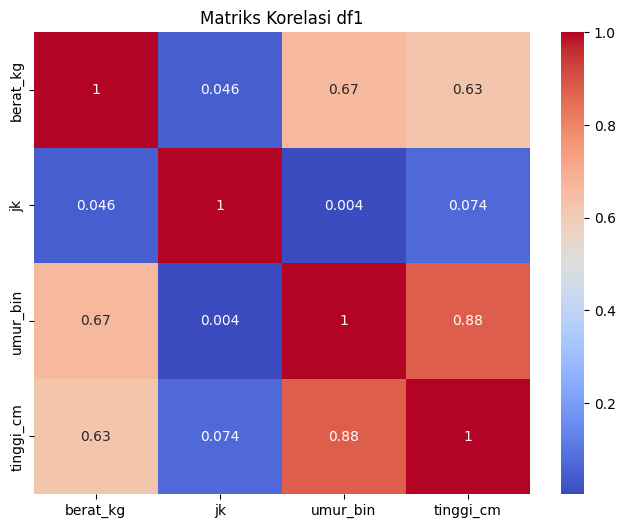

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

plt.title("Matriks Korelasi df1")
plt.show()


In [24]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan
# Variabel dependen
y = df1["berat_kg"]

# Fitur (X) adalah umur dan tinggi
# Variabel independen
X = df1[["umur_bin", "tinggi_cm"]]

# Bagi data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state supaya hasil konsisten
)

# Cetak pembagian data
print("Jumlah data train:", len(X_train))
print("Jumlah data test :", len(X_test))

# Cek apakah sudah ada konstanta pada data training
X_train.head()


Jumlah data train: 80000
Jumlah data test : 20000


,umur_bin,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [29]:
import statsmodels.api as sm

# Tambahkan konstanta
X_train_const = sm.add_constant(X_train)

# Tampilkan beberapa baris pertama
X_train_const.head()

,const,umur_bin,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [30]:
import statsmodels.api as sm

# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()

print('----------------------------')
print(model.params)
print('----------------------------\n')

# Ambil koefisien model
const = model.params['const']
x1_umur = model.params['umur_bin']
x2_tinggi = model.params['tinggi_cm']

# Print persamaan regresi
print(f"y = ({const:.3f}) + ({x1_umur:.3f})*x1 + ({x2_tinggi:.3f})*x2")


----------------------------
const        2.545617
umur_bin     0.229719
tinggi_cm    0.054192
dtype: float64
----------------------------

y = (2.546) + (0.230)*x1 + (0.054)*x2


In [31]:
#Tampilkan ringkasan hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Sun, 12 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:02:38   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

In [32]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bin"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - error/aktual)), dibatasi 0–100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil


,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845


Praktikum Mandiri dengan dataset day.csv

In [40]:
#Baca dataset
import pandas as pd

df = pd.read_csv(path + "data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menentukan Variabel Dependen dan Independen

In [41]:
# Variabel dependen (Y)
# 'cnt' adalah jumlah total sepeda yang disewa (casual + registered)
y = df['cnt']

# Variabel independen (X)
# Dipilih berdasarkan faktor-faktor yang dapat memengaruhi jumlah sewa sepeda
X = df[['temp', 'atemp', 'hum', 'windspeed', 'workingday', 'season', 'weathersit']]

# Tampilkan beberapa baris pertama untuk memastikan kolom benar
X.head()


,temp,atemp,hum,windspeed,workingday,season,weathersit
0,0.344167,0.363625,0.805833,0.160446,0,1,2
1,0.363478,0.353739,0.696087,0.248539,0,1,2
2,0.196364,0.189405,0.437273,0.248309,1,1,1
3,0.200000,0.212122,0.590435,0.160296,1,1,1
4,0.226957,0.229270,0.436957,0.186900,1,1,1


Bagi data (train dan test)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Buat model regresi

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Prediksi dan evaluasi

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


R²: 0.5433087626555962
MAE: 1146.9642816913724
RMSE: 1353.2472442161447


Tampilkan hasil regresi

In [45]:
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)


Koefisien: [ 2710.67757286  3216.9223836  -2254.69405215 -2529.86386355
   168.99121463   420.17081296  -478.6391656 ]
Intercept: 3078.9376506203434


Visualisasi

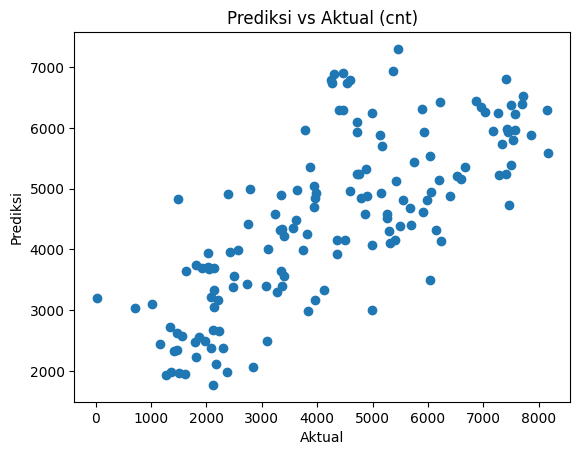

In [46]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Prediksi vs Aktual (cnt)")
plt.show()
